In [1]:
## import necessary packages
import numpy as np
import pandas as pd

# visualiazation packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import cufflinks as cf
cf.go_offline()  # offline plotting

# adjust Pandas display
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

In [2]:
# load the data
dframe = pd.read_csv('Files/task.csv')

# preview the data
dframe.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# dimensions of the data
dframe.shape

(10999, 12)

In [4]:
# data info
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# summary stat of the numerical variables
dframe.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Comment:**
* From the summary statistics, discount offered has a lot of dispersion and this is reflected by its high standard deviation and variation between the mean and the median.

* Weight_in_gms appears to be negatively skewed since the median is greater than the mean.

In [6]:
# summary stat of the categorical variables
dframe.describe(include='O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [7]:
# Split the data into numerical and categorical variables
# Determine the variables to drop
# Determine the variables to transform
# Determine how outliers or strange values should be handled
# Determine if new features will be added.

In [8]:
def split_variables(df):
    """Returns a list containing numerical and categorical variables"""
    num_cols = df.select_dtypes(include='number').columns.to_list()
    cat_cols = df.select_dtypes(exclude='number').columns.to_list()
    
    result = [num_cols, cat_cols]
    return result

In [9]:
# Split the data into numerical and categorical variables
num_cols = split_variables(dframe)[0]
cat_cols =split_variables(dframe)[1]

In [10]:
# Determine the variables to drop
# value counts
print('\t\tFrequency Table: \n')
for col in num_cols:
    val = dframe[col].value_counts()
    print(f"{col}: \n{val}")
    print("===" * 30)

		Frequency Table: 

ID: 
2047     1
3355     1
7465     1
5416     1
9510     1
        ..
10848    1
4703     1
6750     1
605      1
2049     1
Name: ID, Length: 10999, dtype: int64
Customer_care_calls: 
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
Customer_rating: 
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
Cost_of_the_Product: 
245    110
257    109
260    106
254    101
264    100
      ... 
99       5
107      5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64
Prior_purchases: 
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64
Discount_offered: 
10    860
2     858
6     849
9     845
3     840
7     840
4     825
1     824
5     810
8     801
12     72
52     62
46     61
48     61
20     58
37     58
43     56
44     56
23     55
35     54
56     54
19     53
60     53
63

In [11]:
# value counts
print('\t\tFrequency Table: \n')
for col in cat_cols:
    val = dframe[col].value_counts()
    print(f"{col}: \n{val}")
    print("===" * 30)

		Frequency Table: 

Warehouse_block: 
F    3666
D    1834
B    1833
C    1833
A    1833
Name: Warehouse_block, dtype: int64
Mode_of_Shipment: 
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
Product_importance: 
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
Gender: 
F    5545
M    5454
Name: Gender, dtype: int64


In [12]:
dframe1 = dframe.copy()

# drop: 'ID' since it doesn't contribute much to the task at hand
dframe1 = dframe1.drop(columns=['ID'])

In [13]:
# Transform the variables
for col in ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']:
    dframe1[col] = dframe1[col].astype('object')

In [14]:
# Split the data into numerical and categorical variables
num_cols = split_variables(dframe1)[0]
cat_cols =split_variables(dframe1)[1]

In [15]:
dframe1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Univariate Analysis

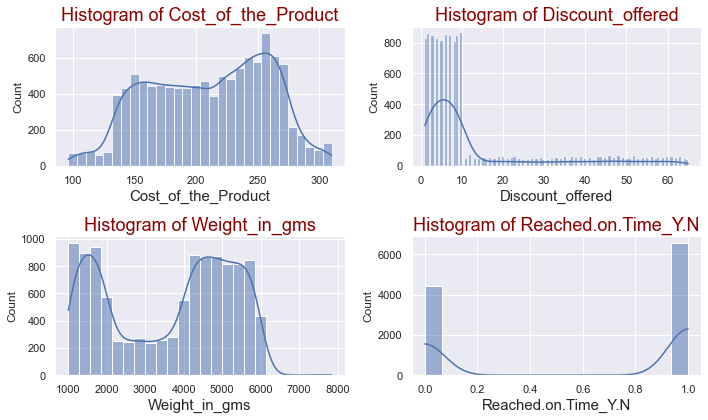

In [16]:
# Numerical data
nrows, ncols = (2, 2)
color = 'darkred'
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*5, ncols*3))

for (idx, col) in enumerate(num_cols):
    ax = axs[(idx // ncols), (idx % ncols)]
    sns.histplot(data=dframe1, x=col, kde=True, ax=ax)
    ax.set_xlabel(f"{col}", fontsize=15)
    ax.set_title(f"Histogram of {col}", fontsize=18, color=color)
    
fig.tight_layout()
plt.show()

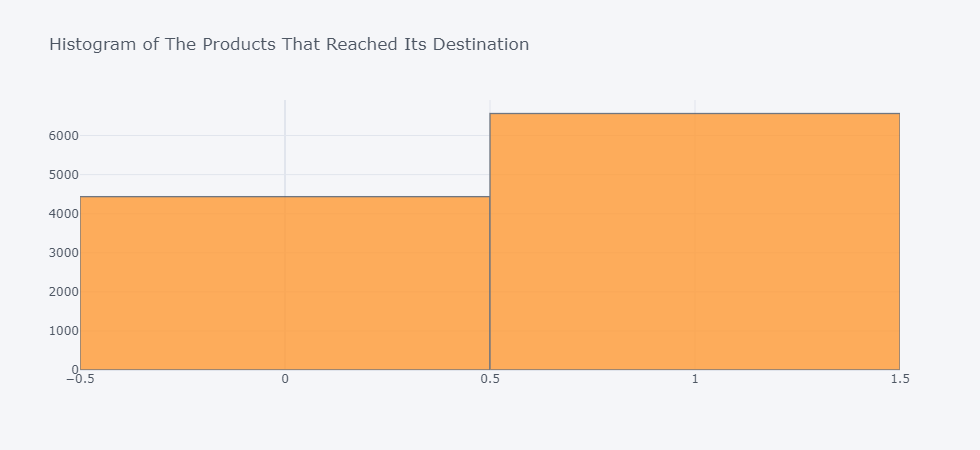

In [17]:
dframe1['Reached.on.Time_Y.N'].iplot(kind='histogram', title='Histogram of The Products That Reached Its Destination')

**Comment:**
* The distribution of `Cost_of_the_Product` is fairly a normal distribution.
* The distribution of `Discount_offered` follows an exponential distribution and it's positively skewed.
* The distribution of `Weight_in_gms` does not follow a normal distribution.
* The distribution of `Reached.on.Time_Y.N` shows that it's a categorical variable.

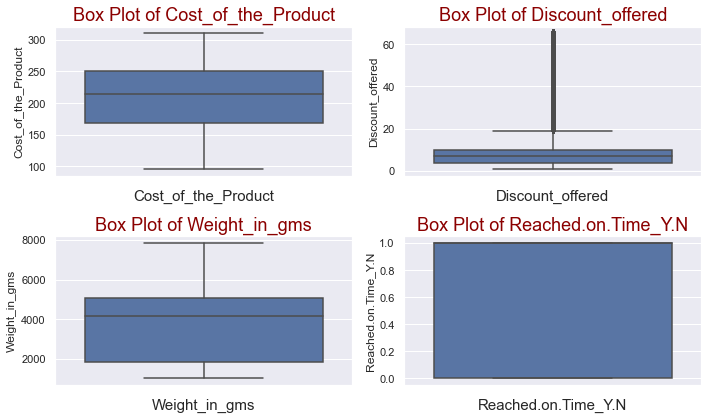

In [18]:
# Numerical data
nrows, ncols = (2, 2)
color = 'darkred'
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*5, ncols*3))

for (idx, col) in enumerate(num_cols):
    ax = axs[(idx // ncols), (idx % ncols)]
    sns.boxplot(data=dframe1, y=col, ax=ax)
    ax.set_xlabel(f"{col}", fontsize=15)
    ax.set_title(f"Box Plot of {col}", fontsize=18, color=color)
    
fig.tight_layout()
plt.show()

**Comment:**
* Boxplot of `Discount_offered` shows that the variable contains lots of outliers in the maximum value region.

		Frequency Table: 
Yes    6563
No     4436
Name: Reached.on.Time_Y.N, dtype: int64


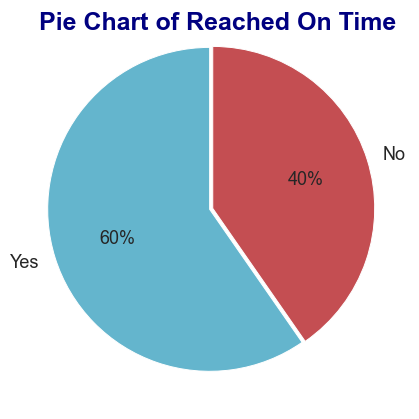

In [19]:
reachd_on_time = dframe1['Reached.on.Time_Y.N'].astype('object')
reachd_on_time = reachd_on_time.map({1:'Yes', 0:'No'})
value = reachd_on_time.value_counts()

print(f"\t\tFrequency Table: \n{value}")
print('===' * 30)

plt.figure(figsize=(10, 6))

color = 'navy'
plt.pie(x=value, explode=[0, 0.02], labels=['Yes', 'No'], colors=['c', 'r'], 
        startangle=90, autopct='%1.0f%%', textprops={'fontsize': 18})
plt.title('Pie Chart of Reached On Time', fontsize=25, color=color, y=.93, x=.52, fontweight='bold')

plt.tight_layout()
plt.show()

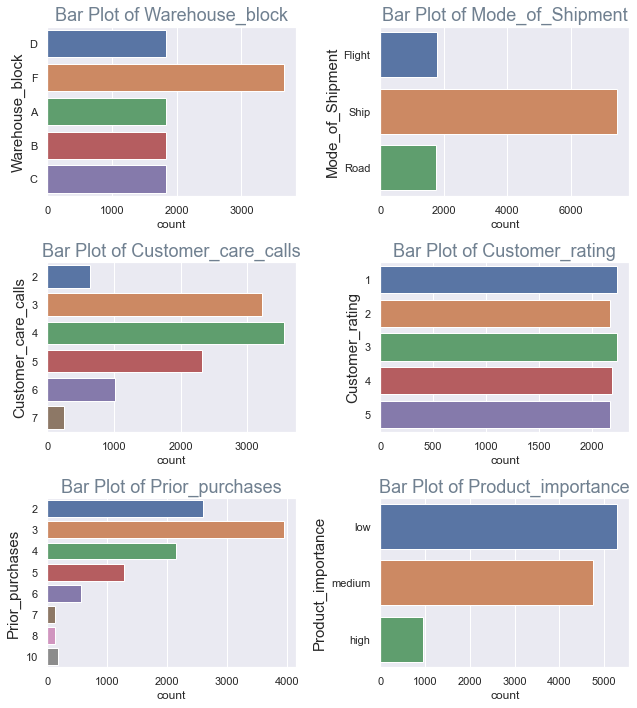

In [20]:
# Categorical data
nrows, ncols = (3, 2)
color = 'slategrey' 
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*3, ncols*5))

for (idx, col) in enumerate(cat_cols):
    if col != 'Gender':
        ax = axs[(idx // ncols), (idx % ncols)]
        sns.countplot(data=dframe1, y=col, ax=ax)
        ax.set_ylabel(f"{col}", fontsize=15)
        ax.set_title(f"Bar Plot of {col}", fontsize=18, color=color)
    
fig.tight_layout()
plt.show()

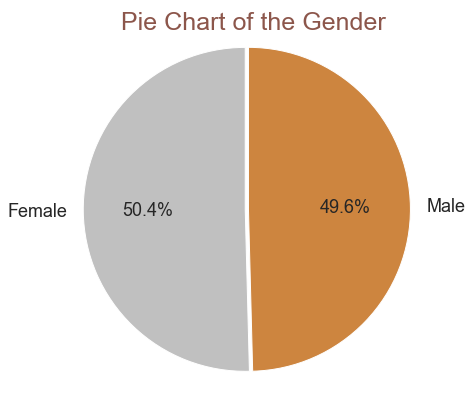

In [21]:
plt.figure(figsize=(10, 6))
value = dframe1['Gender'].value_counts()
color = 'tab:brown'

plt.pie(x=value, explode=[0, 0.02], labels=['Female', 'Male'], colors=['silver', 'peru'], 
        startangle=90, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Pie Chart of the Gender', fontsize=25, color=color, y=.93, x=.52)

plt.tight_layout()
plt.show()

### Multivariate Analysis

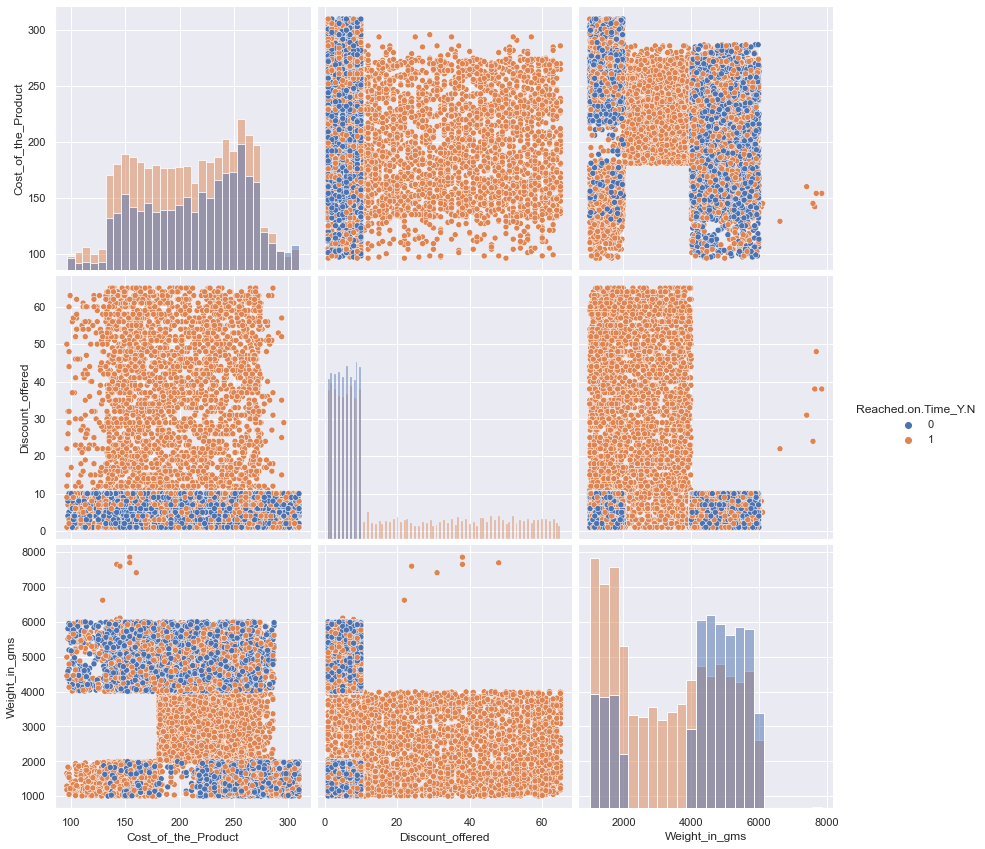

In [22]:
sns.pairplot(data=dframe1[num_cols], hue='Reached.on.Time_Y.N', diag_kind='hist', height=4)
plt.show()

**Comment:**
* There's no apparent relationship between the variables.

In [23]:
dframe1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


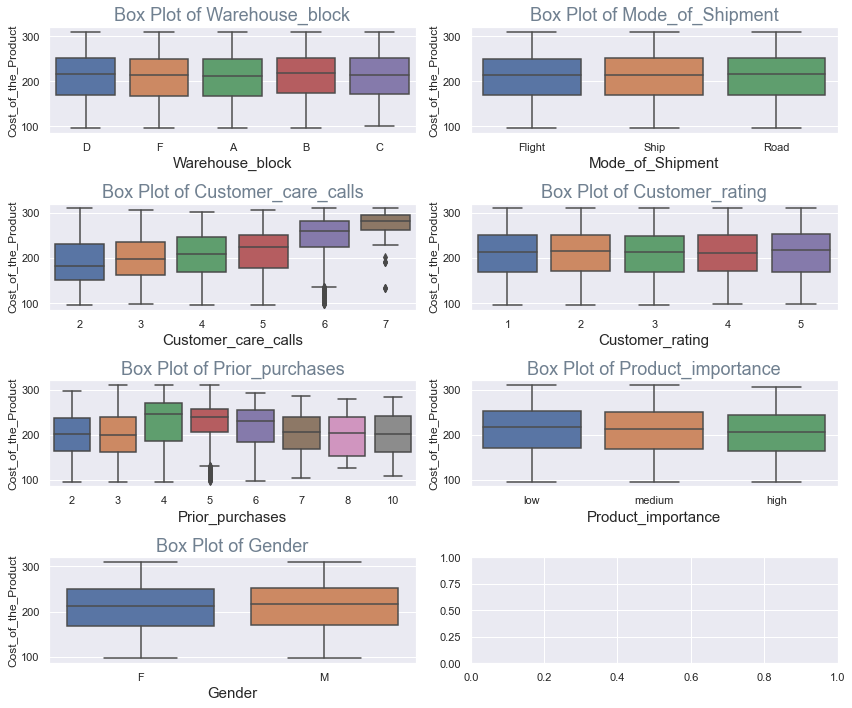

In [24]:
# Categorical data
nrows, ncols = (4, 2)
color = 'slategrey' 
fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*3, ncols*5))

for (idx, col) in enumerate(cat_cols):
    ax = axs[(idx // ncols), (idx % ncols)]
    sns.boxplot(data=dframe1, x=col, y='Cost_of_the_Product', ax=ax)
    ax.set_xlabel(f"{col}", fontsize=15)
    ax.set_title(f"Box Plot of {col}", fontsize=18, color=color)
    
fig.tight_layout()
plt.show()

**Comment:**
* It seems that as the number of customer care calls increases, the cost of the product increases.

In [25]:
dframe1.groupby([reachd_on_time]).agg(['mean', 'median'])

Cost_of_the_Product        Discount_offered         \
                                   mean median             mean median   
Reached.on.Time_Y.N                                                      
No                           214.498647    222         5.545987      6   
Yes                          207.289197    209        18.663721      9   

                    Weight_in_gms        Reached.on.Time_Y.N         
                             mean median                mean median  
Reached.on.Time_Y.N                                                  
No                    4168.668395   4674                   0      0  
Yes                   3272.640104   3231                   1      1

**Comment:**
* The median `cost of the product` is higher for products that did not reach on time.
* The mean value of the `discount offered` is higher for the products that reached on time.
* The mean value of the `weight in grams` is higher for the product that did not reach on time.

In [26]:
for col in cat_cols:
    val = dframe1.groupby([col])[['Cost_of_the_Product', 'Weight_in_gms']]
    val = val.agg(['median'])
    print(f"{col}: \n{val}")
    print("===" * 20)

Warehouse_block: 
                Cost_of_the_Product Weight_in_gms
                             median        median
Warehouse_block                                  
A                               212        4127.0
B                               219        4149.0
C                               214        4182.0
D                               216        4134.5
F                               213        4153.5
Mode_of_Shipment: 
                 Cost_of_the_Product Weight_in_gms
                              median        median
Mode_of_Shipment                                  
Flight                           214        4152.0
Road                             216        4194.5
Ship                             214        4141.5
Customer_care_calls: 
                    Cost_of_the_Product Weight_in_gms
                                 median        median
Customer_care_calls                                  
2                                   182        4164.0
3                  

**Comment:**
* `Warehouse_block`: Block 'B' has the highest cost of product while Block 'A' has the lowest cost and weight of product.
* `Mode_of_Shipment`: Cost and weight of the products shipped by road is slightly higher than the other modes of shipment.
* `Customer_care_calls`: As the number of customer care calls increases, the cost of the product also increases. The weight of the products tends to reduce as the number of customer calls increases.
* `Customer_rating`: Customer rating has no apparent effect on the cost of the products.
* `Prior_purchases`: Prior purchases between 4 and 6 tend to have high cost of products and low weights.
* `Product_importance`: Products with low importance suprisingly have high cost and low weights.
* `Gender`: The cost of the products purchased by males is higher than that of females while the weight of the product purchased by females is higher.

In [27]:
pd.crosstab(dframe1["Gender"], columns=dframe1['Mode_of_Shipment'], margins=True, normalize=True)

Mode_of_Shipment,Flight,Road,Ship,All
Gender,,,,
F,0.078371,0.082553,0.343213,0.504137
M,0.083189,0.077462,0.335212,0.495863
All,0.161560,0.160015,0.678425,1.000000


**Comment:**
* 68% of people purchased products which the mode of shipping is 'Ship' was by shipping. This means that more people are likely to purshase products shipped through the sea. 

In [28]:
print(f"{0.292481 + 0.323393 + 0.211656} \n")
pd.crosstab(dframe1["Gender"], columns=dframe1['Customer_care_calls'], margins=True, normalize=True)

0.8275300000000001 



Customer_care_calls,2,3,4,5,6,7,All
Gender,,,,,,,
F,0.029912,0.148013,0.161833,0.106191,0.046913,0.011274,0.504137
M,0.028093,0.144468,0.161560,0.105464,0.045186,0.011092,0.495863
All,0.058005,0.292481,0.323393,0.211656,0.092099,0.022366,1.000000


**Comment:**
* Customer care calls made between 3 and 5 amounts to about 83% of the total number of customer care calls. This means that most customers are likely to make between 3 to 5 calls.